In [3]:
import os

In [4]:
os.environ['PROJ_LIB'] ='/home/yl238/anaconda3/envs/tensorflow_p37/share/proj'

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
tornados = '../data/tornados_201906252331.csv'
df = pd.read_csv(tornados)

In [10]:
df['MONTH'] = df['YEARMONTH'].astype(str).str[-2:]

In [12]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)

NameError: name 'data' is not defined

In [11]:
df.head()

,EVENT_ID,EPISODE_ID,YEARMONTH,EVENT_TYPE,TOR_F_SCALE,YEAR,MONTH_NAME,DAMAGE_PROPERTY,LOCATION,STATE,LONGITUDE,LATITUDE,MONTH
0,456,47,200610,Tornado,F2,2006,October,60.00K,ORIENT,OHIO,-83.1100,39.8000,10
1,457,47,200610,Tornado,F2,2006,October,50.00M,NEW ALBANY,OHIO,-82.7900,40.0900,10
2,655,171,200610,Tornado,F0,2006,October,75.00K,BAYOU GEORGE,FLORIDA,-85.5364,30.2834,10
3,655,171,200610,Tornado,F0,2006,October,75.00K,BAYOU GEORGE,FLORIDA,-85.5300,30.2845,10
4,656,172,200610,Tornado,F1,2006,October,1.00M,APALACHICOLA,FLORIDA,-85.0000,29.7100,10


In [10]:
counts = df.drop_duplicates(subset='EVENT_ID').groupby(['YEAR', 'MONTH']).count()['EPISODE_ID']

Text(0.5, 1.0, 'Number of tornado events per month 2000-2019')

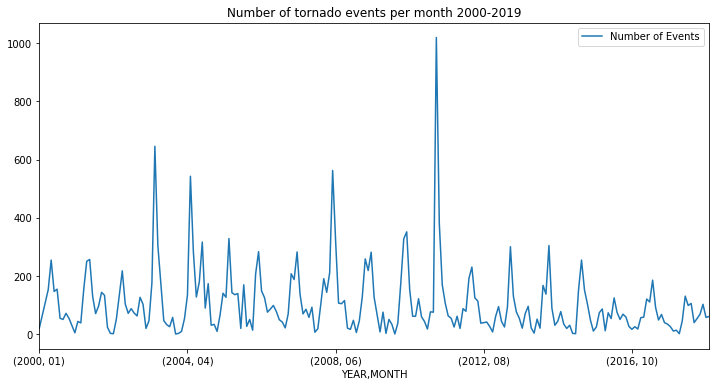

In [21]:
f, ax = plt.subplots(figsize=(12, 6))
pd.DataFrame(counts).plot(ax=ax)
ax.legend(['Number of Events'])
ax.set_title('Number of tornado events per month 2000-2019')

In [22]:
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import get_provider, Vendors

In [23]:
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 700000),
          x_axis_type='mercator', y_axis_type='mercator')
p.add_tile(tile_provider)

show(p)

In [5]:
from mpl_toolkits.basemap import Basemap

/home/yl238/anaconda3/envs/tensorflow_p37/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/home/yl238/anaconda3/envs/tensorflow_p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


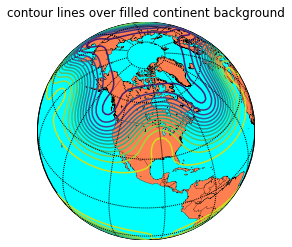

In [7]:
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


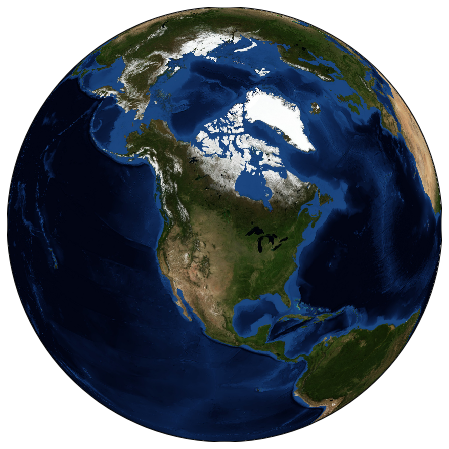

In [8]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);